### KNeighborsClassifier

En este Notebook pretendemos entrenador el modelo *KNeighborsClassifier* con el nuevo análisis de datos realizado en *07_feature_importances.ipynb*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("08_feature_importances.csv")
pd.options.display.max_columns = None

In [3]:
df

,Action Taken,Severity Level,Attack Type,Destination Port,Source Port,Anomaly Scores,Packet Length,Localidad
0,2,1,2,7709,14137,2827,439,134
1,0,1,2,21888,7587,5070,1110,60
2,1,1,0,24463,7388,8595,242,61
3,0,2,2,14681,8913,1556,321,135
4,0,1,0,11942,2365,50,1398,20
...,...,...,...,...,...,...,...,...
39995,2,2,0,2665,14033,3870,1364,210
39996,2,0,0,12634,731,2687,1120,307
39997,0,1,0,11250,10087,3058,979,178
39998,1,1,2,774,8909,9613,419,252


In [4]:
# validamos que nuestro objetivo a predecir se corresponde a datos balanceados.
print(df['Action Taken'].value_counts())
print('')
print(df['Severity Level'].value_counts())
print('')
print(df['Attack Type'].value_counts())

Action Taken
0    13529
1    13276
2    13195
Name: count, dtype: int64

Severity Level
2    13435
0    13382
1    13183
Name: count, dtype: int64

Attack Type
0    13428
2    13307
1    13265
Name: count, dtype: int64


In [5]:
# utilizamos el módulo 'train_test_split' para dividir nuestra muestra en dos conjuntos de datos 'train y test' 
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, shuffle=True, stratify=df['Action Taken'], random_state=42)

print("(filas,columas) train:",train.shape)
print("(filas,columas) test:",test.shape)


(filas,columas) train: (32000, 8)
(filas,columas) test: (8000, 8)


### Action Taken

Entrenaremos los modelos utilizando la columna 'Action Taken' como objetivo a predecir.

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [7]:
# escalamos los datos con el módulo 'StandardScaler' para lograr eficiencia y evitar error en los modelos de entrenamiento.
X_train = train.drop('Action Taken', axis=1)
y_train = train['Action Taken']

X_test = test.drop('Action Taken', axis=1)
y_test = test['Action Taken']

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

valores_k = range(1, 5)
precisiones = []
for k in valores_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,Xs_train, y_train, cv=5, scoring='accuracy')
    precisiones.append(scores.mean())

mejor_k = valores_k[np.argmax(precisiones)]
print("El mejor índice para 'k' es:", mejor_k)

El mejor índice para 'k' es: 3


In [9]:
# entrenamos el modelo.
knn = KNeighborsClassifier(n_neighbors=3).fit(Xs_train, y_train)

# predecimos 'y' con el conjunto de datos 'train'.
knn_y_pred = knn.predict(Xs_train)
report_knn = classification_report(y_train, knn_y_pred)
knn_acc = accuracy_score(y_train, knn_y_pred)
knn_confmat = confusion_matrix(y_train, knn_y_pred)

# evaluamos el modelo con el conjunto de datos 'test'
knn_y_pred_test = knn.predict(Xs_test)
report_knn_test = classification_report(y_test, knn_y_pred_test)
knn_acc_test = accuracy_score(y_test, knn_y_pred_test)
knn_confmat_test = confusion_matrix(y_test, knn_y_pred_test)

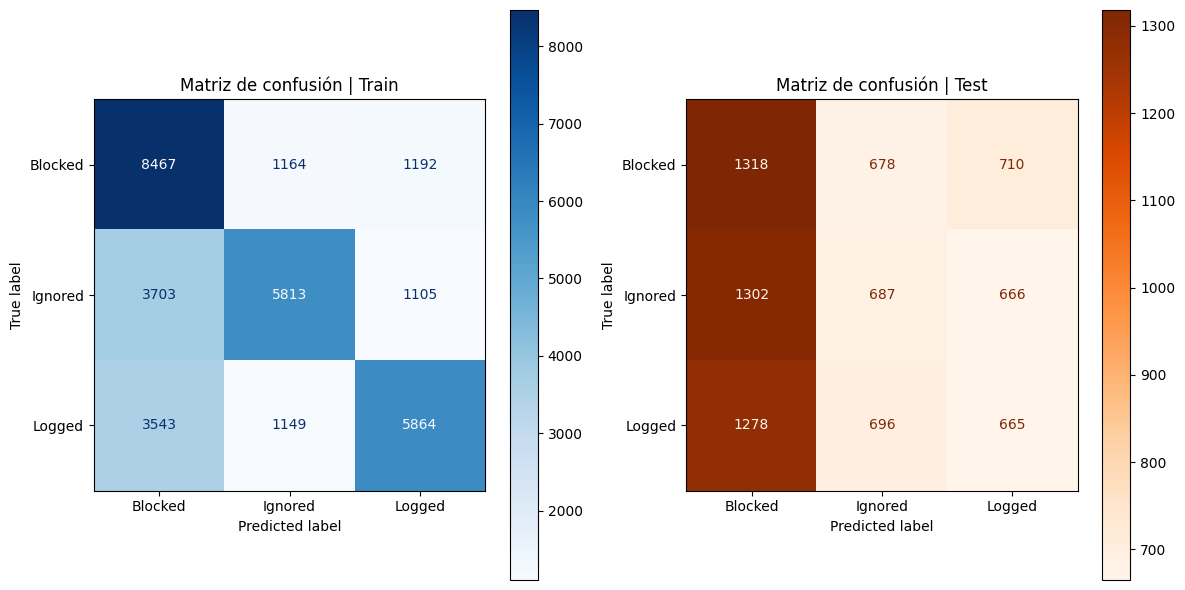

Reporte de Clasificación

train               precision    recall  f1-score   support

           0       0.54      0.78      0.64     10823
           1       0.72      0.55      0.62     10621
           2       0.72      0.56      0.63     10556

    accuracy                           0.63     32000
   macro avg       0.66      0.63      0.63     32000
weighted avg       0.66      0.63      0.63     32000


test               precision    recall  f1-score   support

           0       0.34      0.49      0.40      2706
           1       0.33      0.26      0.29      2655
           2       0.33      0.25      0.28      2639

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.32      8000
weighted avg       0.33      0.33      0.33      8000

accuracy_score_train: 62.95%
accuracy_score_test: 33.38%


In [10]:
# graficamos confusion_matrix del modelo entrenado train y test para realizar una comparación visual.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
clases_a_predecir = ['Blocked', 'Ignored', 'Logged']
ConfusionMatrixDisplay(knn_confmat, display_labels=clases_a_predecir).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de confusión | Train")
ConfusionMatrixDisplay(knn_confmat_test, display_labels=clases_a_predecir).plot(ax=axes[1], cmap='Oranges')
axes[1].set_title("Matriz de confusión | Test")
plt.tight_layout()
plt.show()

# pintamos los resultados de 'classification_report' y 'accuracy_score'
print("Reporte de Clasificación")
print("")
print("train", report_knn)
print("")
print("test", report_knn_test)
print(f"accuracy_score_train: {knn_acc*100:.2f}%")
print(f"accuracy_score_test: {knn_acc_test*100:.2f}%")

Revisar

### Severity Level

Entrenaremos los modelos utilizando la columna 'Severity Level' como objetivo a predecir.

In [11]:
X_train = train.drop('Severity Level', axis=1)
y_train = train['Severity Level']

X_test = test.drop('Severity Level', axis=1)
y_test = test['Severity Level']

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

In [12]:
valores_k = range(1, 5)
precisiones = []
for k in valores_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,Xs_train, y_train, cv=5, scoring='accuracy')
    precisiones.append(scores.mean())

mejor_k = valores_k[np.argmax(precisiones)]
print("El mejor índice para 'k' es:", mejor_k)

El mejor índice para 'k' es: 3


In [13]:
knn = KNeighborsClassifier(n_neighbors=3).fit(Xs_train, y_train)

knn_y_pred = knn.predict(Xs_train)
report_knn = classification_report(y_train, knn_y_pred)
knn_acc = accuracy_score(y_train, knn_y_pred)
knn_confmat = confusion_matrix(y_train, knn_y_pred)

knn_y_pred_test = knn.predict(Xs_test)
report_knn_test = classification_report(y_test, knn_y_pred_test)
knn_acc_test = accuracy_score(y_test, knn_y_pred_test)
knn_confmat_test = confusion_matrix(y_test, knn_y_pred_test)

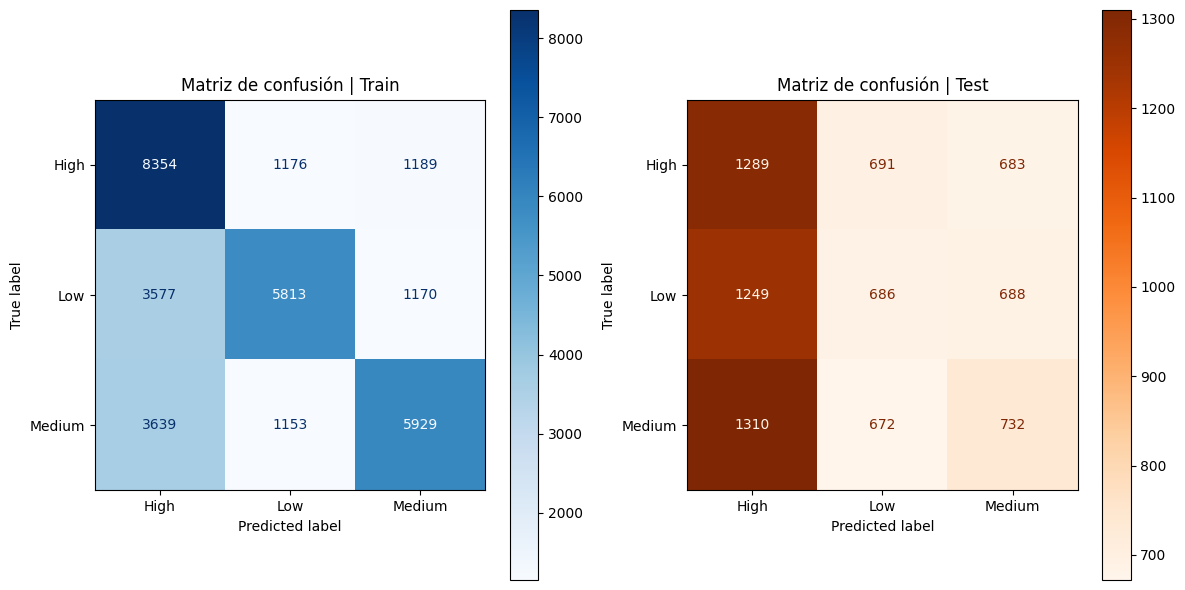

Reporte de Clasificación

train               precision    recall  f1-score   support

           0       0.54      0.78      0.64     10719
           1       0.71      0.55      0.62     10560
           2       0.72      0.55      0.62     10721

    accuracy                           0.63     32000
   macro avg       0.66      0.63      0.63     32000
weighted avg       0.66      0.63      0.63     32000


test               precision    recall  f1-score   support

           0       0.33      0.48      0.40      2663
           1       0.33      0.26      0.29      2623
           2       0.35      0.27      0.30      2714

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.33      8000
weighted avg       0.34      0.34      0.33      8000

accuracy_score_train: 62.80%
accuracy_score_test: 33.84%


In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
clases_a_predecir = ['High','Low','Medium']
ConfusionMatrixDisplay(knn_confmat, display_labels=clases_a_predecir).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de confusión | Train")
ConfusionMatrixDisplay(knn_confmat_test, display_labels=clases_a_predecir).plot(ax=axes[1], cmap='Oranges')
axes[1].set_title("Matriz de confusión | Test")
plt.tight_layout()
plt.show()

print("Reporte de Clasificación")
print("")
print("train", report_knn)
print("")
print("test", report_knn_test)
print(f"accuracy_score_train: {knn_acc*100:.2f}%")
print(f"accuracy_score_test: {knn_acc_test*100:.2f}%")

Revisar

### Attack Type

Entrenaremos los modelos utilizando la columna 'Attack Type' como objetivo a predecir.

In [15]:
X_train = train.drop('Attack Type', axis=1)
y_train = train['Attack Type']

X_test = test.drop('Attack Type', axis=1)
y_test = test['Attack Type']

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

In [16]:
valores_k = range(1, 5)
precisiones = []
for k in valores_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,Xs_train, y_train, cv=5, scoring='accuracy')
    precisiones.append(scores.mean())

mejor_k = valores_k[np.argmax(precisiones)]
print("El mejor índice para 'k' es:", mejor_k)

El mejor índice para 'k' es: 1


In [17]:
knn = KNeighborsClassifier(n_neighbors=1).fit(Xs_train, y_train)

knn_y_pred = knn.predict(Xs_train)
report_knn = classification_report(y_train, knn_y_pred)
knn_acc = accuracy_score(y_train, knn_y_pred)
knn_confmat = confusion_matrix(y_train, knn_y_pred)

knn_y_pred_test = knn.predict(Xs_test)
report_knn_test = classification_report(y_test, knn_y_pred_test)
knn_acc_test = accuracy_score(y_test, knn_y_pred_test)
knn_confmat_test = confusion_matrix(y_test, knn_y_pred_test)

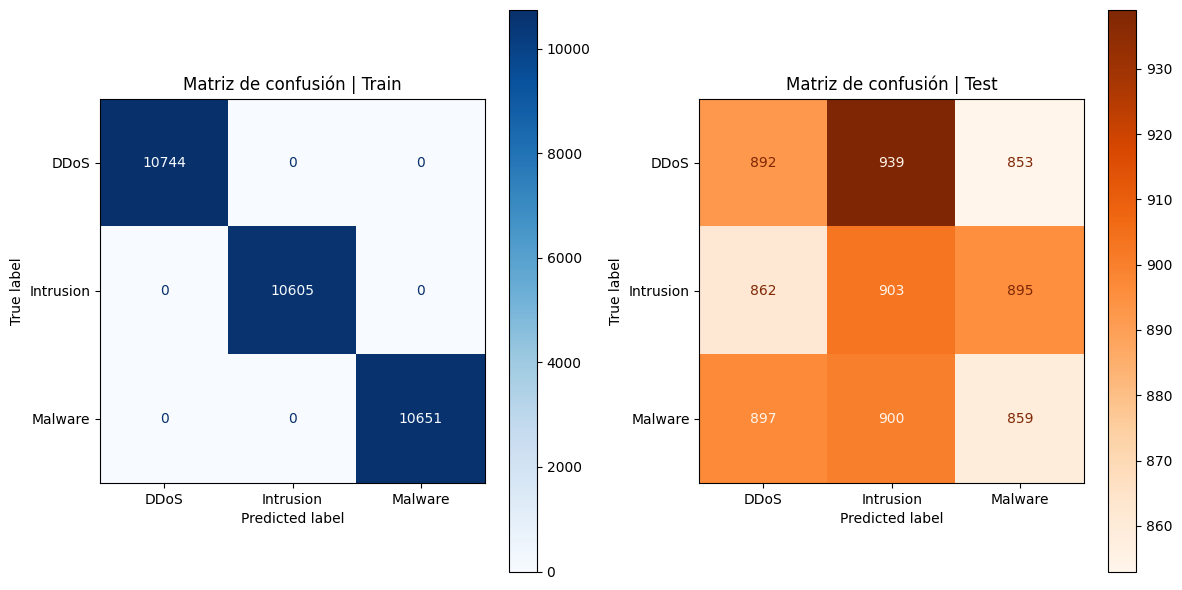

Reporte de Clasificación

train               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10744
           1       1.00      1.00      1.00     10605
           2       1.00      1.00      1.00     10651

    accuracy                           1.00     32000
   macro avg       1.00      1.00      1.00     32000
weighted avg       1.00      1.00      1.00     32000


test               precision    recall  f1-score   support

           0       0.34      0.33      0.33      2684
           1       0.33      0.34      0.33      2660
           2       0.33      0.32      0.33      2656

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000

accuracy_score_train: 100.00%
accuracy_score_test: 33.17%


In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
clases_a_predecir = ['DDoS','Intrusion','Malware']
ConfusionMatrixDisplay(knn_confmat, display_labels=clases_a_predecir).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de confusión | Train")
ConfusionMatrixDisplay(knn_confmat_test, display_labels=clases_a_predecir).plot(ax=axes[1], cmap='Oranges')
axes[1].set_title("Matriz de confusión | Test")
plt.tight_layout()
plt.show()

print("Reporte de Clasificación")
print("")
print("train", report_knn)
print("")
print("test", report_knn_test)
print(f"accuracy_score_train: {knn_acc*100:.2f}%")
print(f"accuracy_score_test: {knn_acc_test*100:.2f}%")

En esta oportunidad también hemos logrado mejorar el Recall, pero no la precisión del modelo.

### Conclusiones

Tanto en el modelo LogisticRegression como en el KNeighborsClassifier se ha mejora el Recall obtenido para los diferentes objetivos a predecir, no así la precisión en el momento de evaluarlos con el conjunto de datos test.

Es correcto conseguir un índice alto de Recall en los entrenamientos, ya que se asume como prioridad "Bloquear ataques de alta severidad" (Particularmente denegaciones de servicios).

Sin embargo, es correcto también buscar un equilibrio en los resultados, para también lograr una alta eficiencia ante nuevos datos desconocidos.

La propuesta principal para mejorar los resultados es
1. Sumar más registros al dataset
2. Entrenar los modelos con conjuntos de datos para "entrenar, validar y testear"